In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numba import jit

In [ ]:
X_RES = 5000
X_MIN = -2
X_MAX = 0.5
Y_RES = 5000
Y_MIN = -1.25
Y_MAX = 1.25

I = 50
T = 2

np.seterr(all='ignore')

In [3]:
# Madlebrot figure
def make_plot(M, cmap='hot', save=False, filename='mandelbrot.png'):
    plt.figure(figsize=(16, 16))
    plt.imshow(M, cmap=cmap, aspect='equal', extent=[X_MIN, X_MAX, Y_MIN, Y_MAX])

    if save:
        plt.savefig(filename, dpi=600, bbox_inches='tight', pad_inches=0)

## Navie (loops) solution

In [4]:
def mandelbrot_naive(c, M, I=I, T=T):
    if c.shape != M.shape:
        raise ValueError('c and M must have the same shape')
    
    for x in range(c.shape[0]):
        for y in range(c.shape[1]):
            z = 0 + 0j
            for i in range(I):
                z = z**2 + c[x, y]
                if T <= abs(z):
                    M[x, y] = i / I
                    break
            else:
                M[x, y] = 1


re = np.linspace(X_MIN, X_MAX, X_RES)
im = np.linspace(Y_MIN, Y_MAX, Y_RES) * 1j

c = re + im[:, np.newaxis]
M = np.zeros((X_RES, Y_RES))

%timeit mandelbrot_naive(c, M)

1min 20s ± 3.29 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


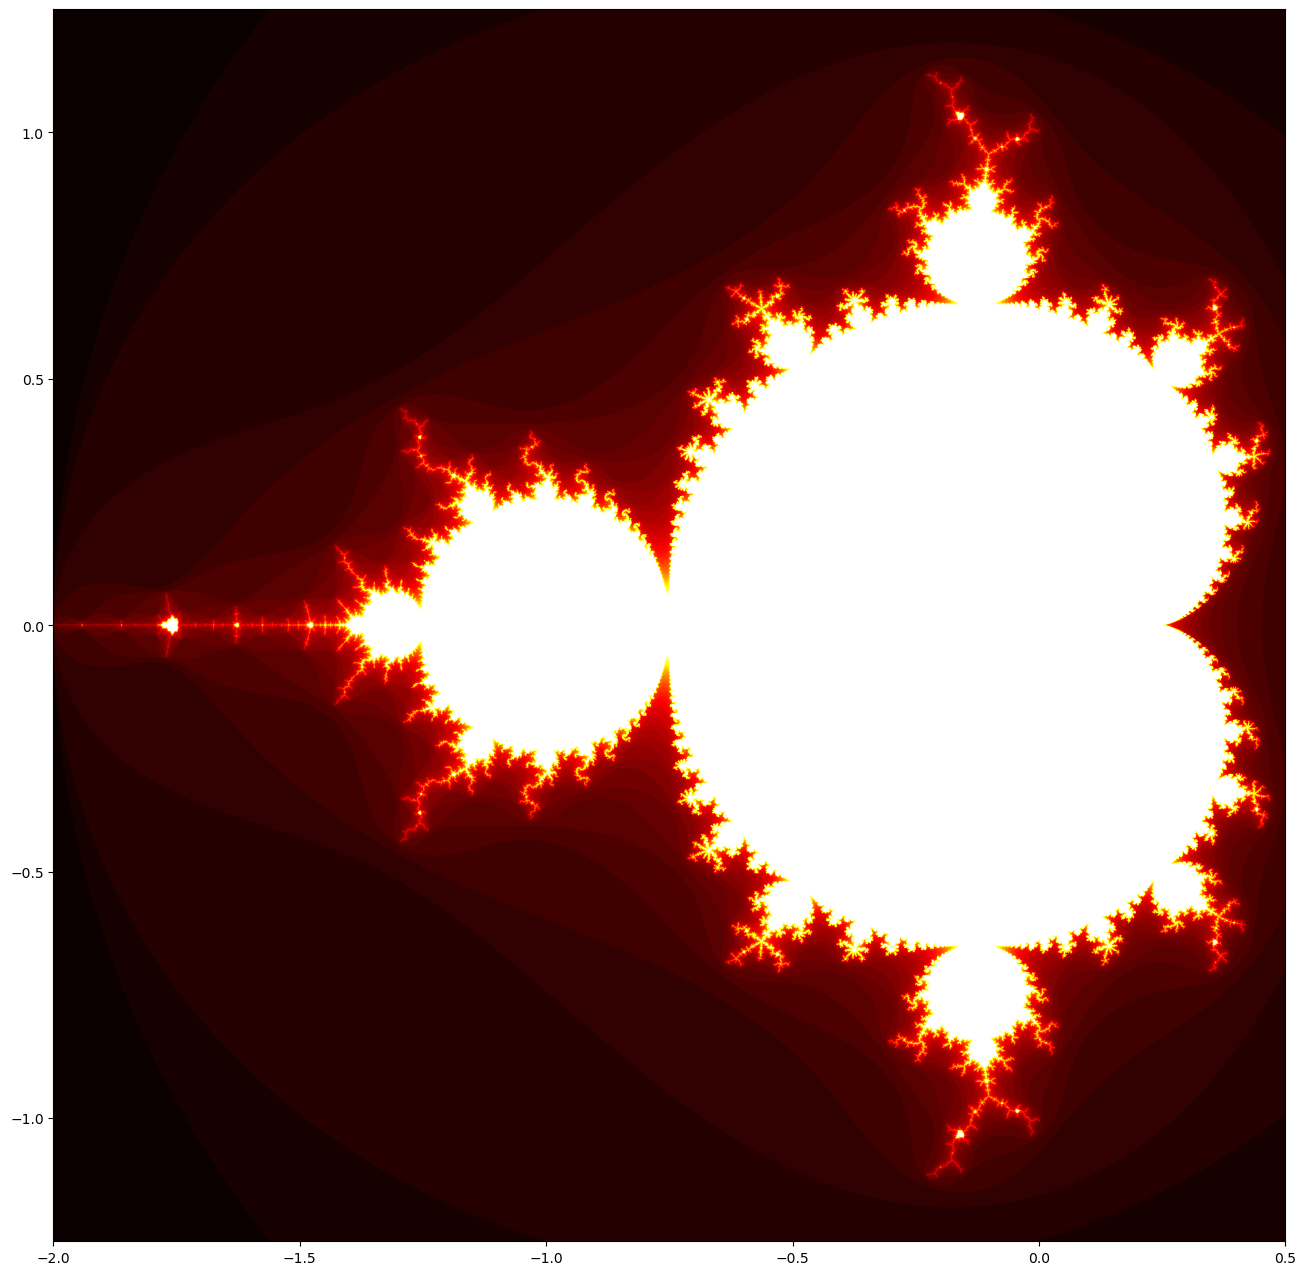

In [5]:
make_plot(M, cmap='hot')

## Numpy (vectorized) solution

In [6]:
def mandelbrot_vectorized(c, M, I=I, T=T):
    if c.shape != M.shape:
        raise ValueError('c and M must have the same shape')
    
    z = np.zeros_like(c)
    for i in range(I):
        z = z**2 + c
        mask = T <= abs(z)
        M[mask] = i / I
        
    M[M == 0] = 1


re = np.linspace(X_MIN, X_MAX, X_RES)
im = np.linspace(Y_MIN, Y_MAX, Y_RES) * 1j

c = re + im[:, np.newaxis]
M = np.zeros((X_RES, Y_RES))

%timeit mandelbrot_vectorized(c, M)

9.3 s ± 398 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


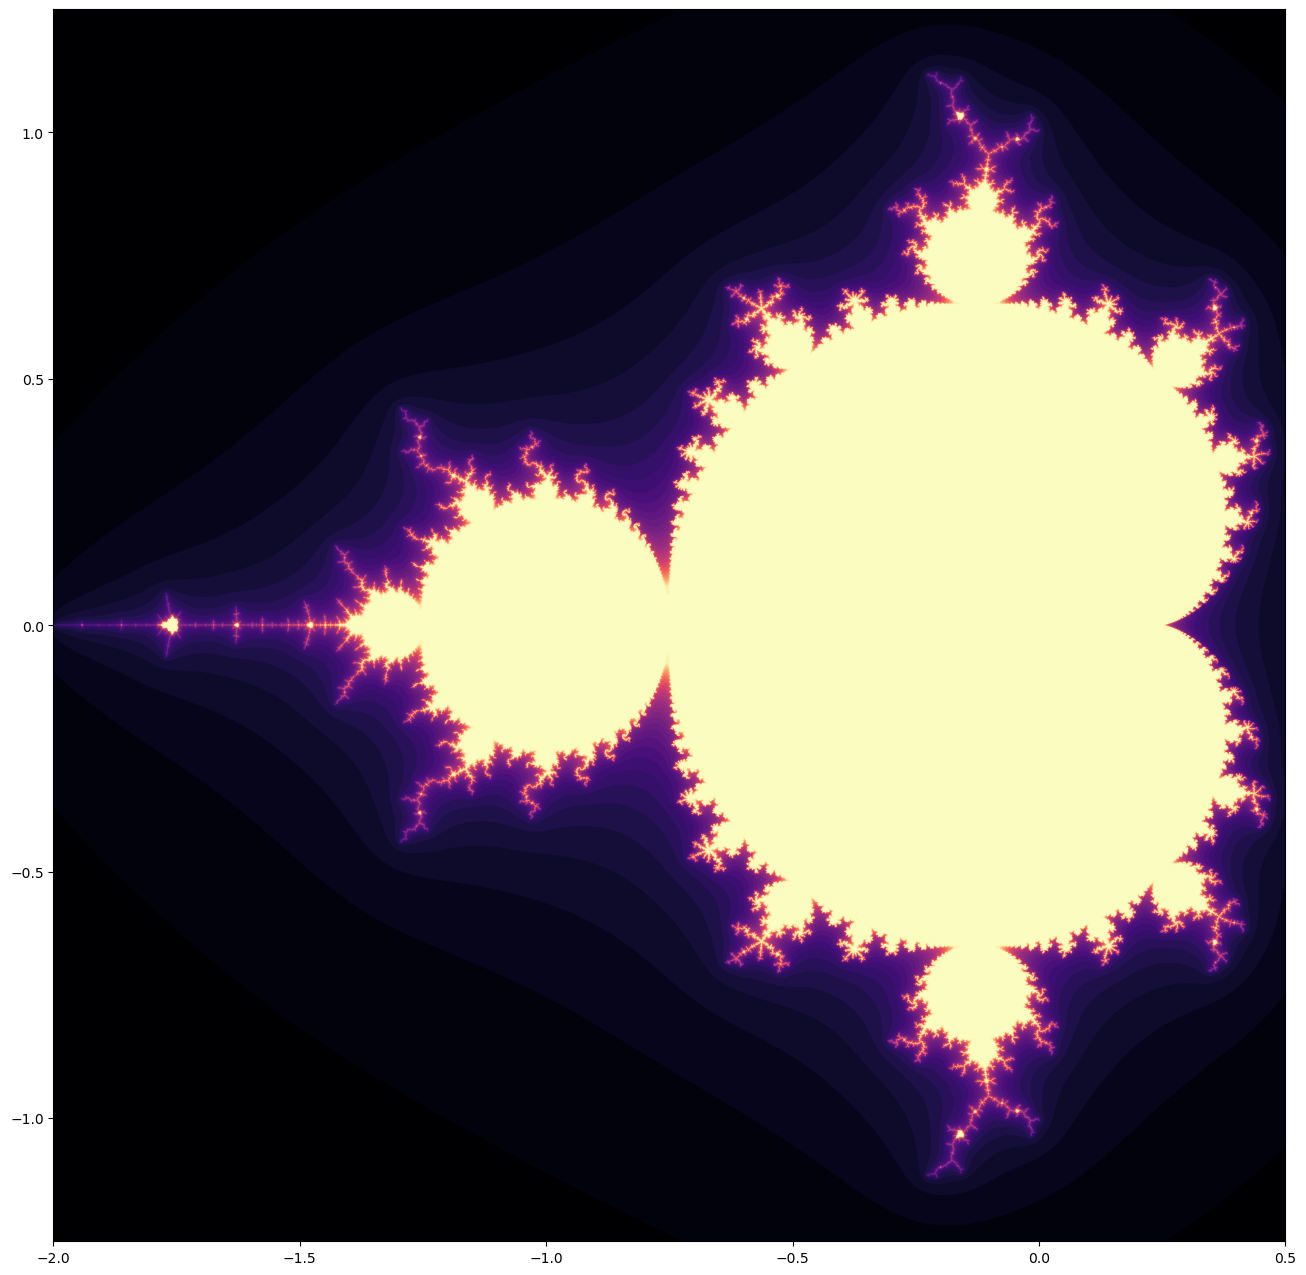

In [7]:
make_plot(M, cmap='magma')

## Numba (optimized) solution

In [8]:
@jit(nopython=True)
def mandelbrot_numba(c, M, I=I, T=T):
    if c.shape != M.shape:
        raise ValueError('c and M must have the same shape')
    
    for x in range(X_RES):
        for y in range(Y_RES):
            z = 0 + 0j
            for i in range(I):
                z = z**2 + c[x, y]
                if T <= abs(z):
                    M[x, y] = i / I
                    break
            else:
                M[x, y] = 1


re = np.linspace(X_MIN, X_MAX, X_RES)
im = np.linspace(Y_MIN, Y_MAX, Y_RES) * 1j

c = re + im[:, np.newaxis]
M = np.zeros((X_RES, Y_RES))
 
%timeit mandelbrot_numba(c, M)

1.44 s ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


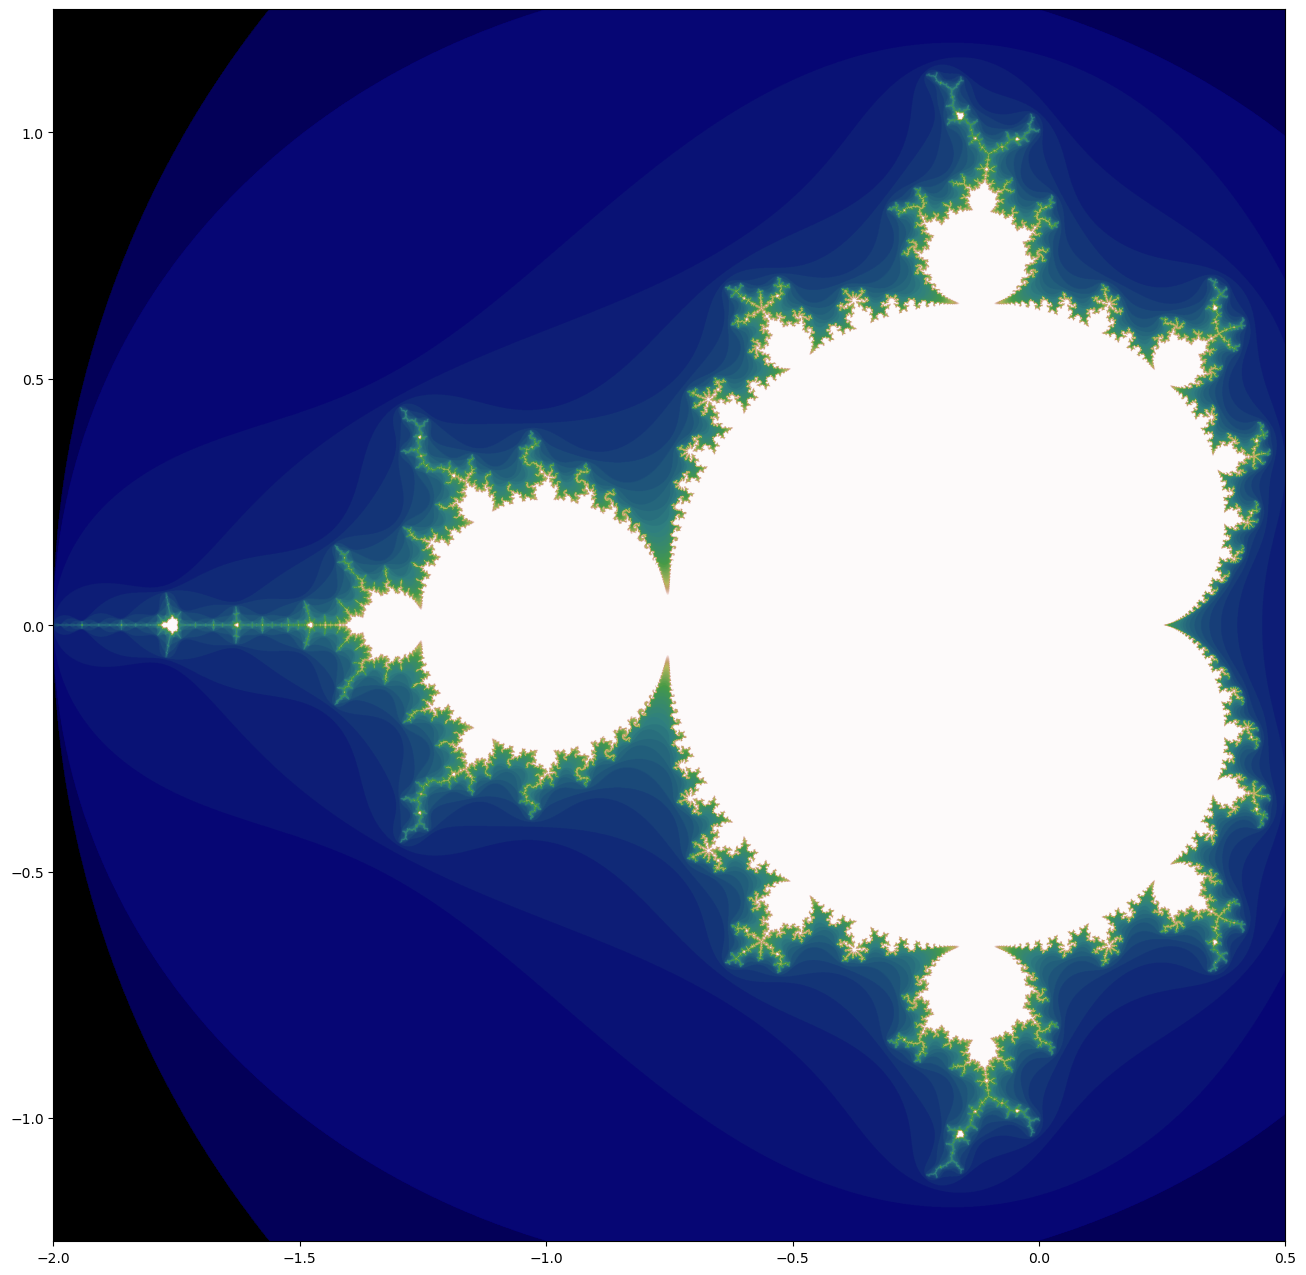

In [9]:
make_plot(M, cmap='gist_earth')

## Parallel (using multiprocessing) solution

In [10]:
from paralell import mandelbrot_paralell

In [11]:
re = np.linspace(X_MIN, X_MAX, X_RES)
im = np.linspace(Y_MIN, Y_MAX, Y_RES) * 1j

c = re + im[:, np.newaxis]
M = np.zeros((X_RES, Y_RES))

%timeit mandelbrot_paralell(c, M, I, T, 8)

3.74 s ± 87.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


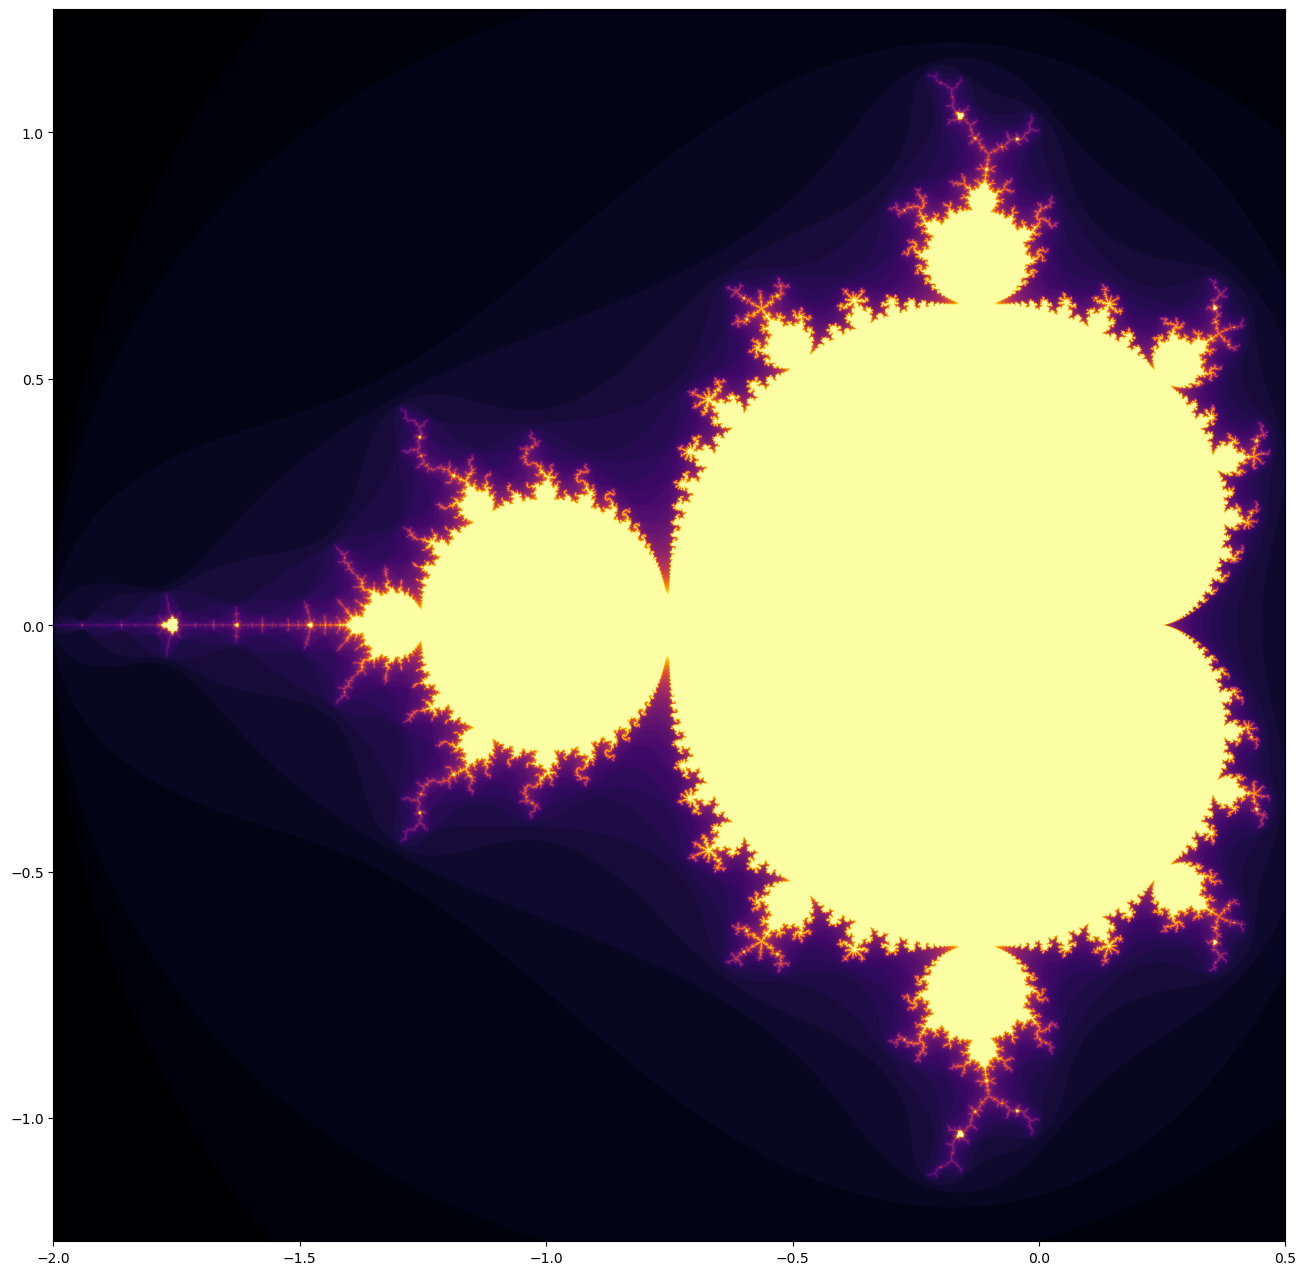

In [12]:
make_plot(M, cmap='inferno')